In [67]:
import numpy as np
import torch
from torch import nn, optim
import torch.nn.functional as F
import torch.utils.data as data
from torchvision import transforms, datasets
import torchvision.transforms.functional as TF
import cv2

import os
from PIL import Image
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [100]:
image_paths = 'bridge1.jpg'
image = Image.open(image_paths)

#### Rotation and Flip

In [101]:
# random rotate
def rotate90(image):
    angle = 90 * np.random.randint(-1, 2, (1,))
    rotated = TF.rotate(image, angle)
    return rotated

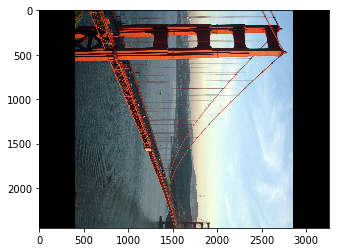

In [102]:
rotated = rotate90(image)
plt.imshow(rotated)

In [71]:
def randFlip(image, probability=0.5):
    r = np.random.rand()
    if r < probability:
        img_flipped = np.fliplr(image)
        return img_flipped
    else:
        return image

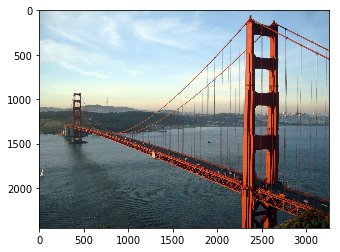

In [76]:
flipped = randFlip(image)
plt.imshow(flipped)


#### Perspective

In [77]:
def randPerspective(image, scale=0.1):
    
    width, height = image.size
    dh, dw = int(scale*height), int(scale*width)
    corner0 = (np.random.randint(0, dh), np.random.randint(0, dh))
    corner1 = (np.random.randint(width - dw - 1, width - 1), np.random.randint(0, dh))
    corner2 = (np.random.randint(width -dw -1, width - 1), np.random.randint(height-dh-1, height-1))
    corner3 = (np.random.randint(0, dw), np.random.randint(height - dh -1, height-1))
    startpoints = np.array([(0, 0), (width - 1, 0), (width - 1, height - 1), (0, height - 1)], dtype=np.float32)
    endpoints = np.array([corner0, corner1, corner2, corner3], dtype=np.float32)

    perspective = TF.perspective(image, startpoints, endpoints)
    return perspective

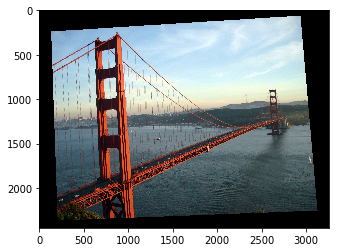

In [78]:
# perspective.save('perspective.jpg')
scale = 0.1
perspect = randPerspective(image, scale)
plt.imshow(perspect)

#### Crop and Zoom

In [79]:
def randCrop(image, scale_range=(0.3, 0.5)):
    code = np.random.randint(0, 5)
    scale = np.random.uniform (scale_range[0], scale_range[1])
    width, height = image.size
    
    img_crop = np.array(image)
    
    if code == 0:
        img_crop = img_crop[int(height*scale):, :, :]
    
    elif code == 1:
        img_crop = img_crop[0:int(-height*scale), :, :]
    
    elif code == 2:
        img_crop = img_crop[:,int(width*scale):, :]
    
    elif code == 3:
        img_crop = img_crop[:, 0:int(-width*scale), :]
    
    # Upsample to original shape
    img_crop = cv2.resize(img_crop, (width, height))
    
    return img_crop

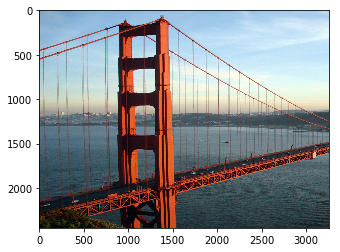

In [81]:
temp = randCrop(image)
plt.imshow(temp)

#### Color

In [82]:
def randBrightness(image):
    brightness = np.random.uniform(0.5, 1.5)
    jitter = brightness * np.array(image).astype(np.float32)
    jitter = np.clip(jitter, 0, 255).astype(np.uint8)
    jittered = Image.fromarray(jitter)
    return jittered

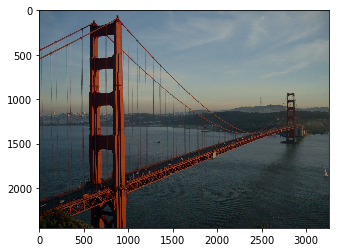

In [84]:
jittered = randBrightness(image)
plt.imshow(jittered)

#### Noise

In [109]:
def block(image, scale=0.1, p=0.1):

    width, height=image.size
    w, h = int(scale*width), int(scale*height)
    mask = np.random.rand(w, h)
    mask = mask > p
    mask = cv2.resize(mask.astype(np.uint8), (width, height), interpolation=0)
    
    blocked = np.stack([mask, mask, mask], axis=2) * np.array(image)
    return blocked

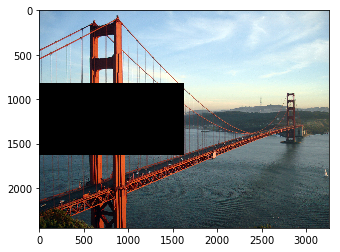

In [103]:
scale=0.001
p=0.05
blocked = block(image, scale, p)
plt.imshow(blocked)

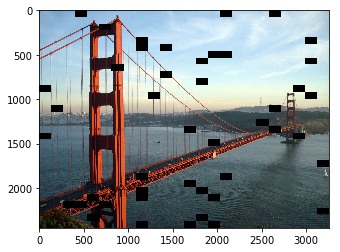

In [104]:
scale=0.01
p=0.05
blocked = block(image, scale, p)
plt.imshow(blocked)

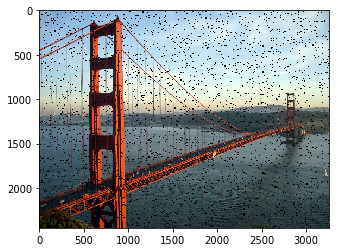

In [105]:
scale=0.1
p=0.05
blocked = block(image, scale, p)
plt.imshow(blocked)